<a href="https://colab.research.google.com/github/ishan-anuranga/PySparkConcepts/blob/main/PySpark_Concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pyspark



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=9b52138e54b0966b106165f6e37c7b254471c567aff78aa3ddc8f9f267f3293f
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [4]:
from pyspark import SparkContext

In [5]:
sc = SparkContext('local', 'PySparkIntro')

In [6]:
from pyspark.sql import SparkSession

In [7]:
spark = SparkSession.builder.appName('PySparkIntro').getOrCreate()

In [8]:
data = [1, 2, 3, 4, 5]
rdd = sc.parallelize(data)

In [9]:
squared_rdd = rdd.map(lambda x: x**2)

In [10]:
even_rdd = rdd.filter(lambda x: x % 2 == 0)

In [11]:
collected_data = squared_rdd.collect()

In [12]:
num_elements = squared_rdd.count()

In [13]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

In [14]:
schema = StructType([
    StructField('Name', StringType(), True),
    StructField('Age', StringType(), True),
    StructField('Salary', StringType(), True)
])

In [15]:
data = [('Alice', 28, 45000), ('Bob', 36, 60000), ('Cathy', 23, 35000)]

In [16]:
ds = spark.createDataFrame(data, schema)

In [17]:
ds = ds.alias('employees')

In [18]:
ds.show()

+-----+---+------+
| Name|Age|Salary|
+-----+---+------+
|Alice| 28| 45000|
|  Bob| 36| 60000|
|Cathy| 23| 35000|
+-----+---+------+



## Dataframe API

In [19]:
# data_file = 'path/to/data.csv'
# df = spark.read.csv(data_file, header=True, inferSchema=True)

In [20]:
data = [('Alice', 28, 45000), ('Bob', 36, 60000), ('Cathy', 23, 35000)]
ds = spark.createDataFrame(data, ['name', 'age', 'salary'])
ds.show()

+-----+---+------+
| name|age|salary|
+-----+---+------+
|Alice| 28| 45000|
|  Bob| 36| 60000|
|Cathy| 23| 35000|
+-----+---+------+



## Semi structured data

In [ ]:
# json_data_file = 'path/to/data.json'
# df_json = spark.read.json(json_data_file)

In [ ]:
# xml_data_file = 'path/to/data.json'
# df_xml = spark.read.format('xml').option('rowTag', 'employee').load(xml_data_file)

# Data cleaning and preprocessing

## Missing values

In [21]:
data_with_missing = [
    ('Alice', 28, 45000),
    ('Bob', None, 60000),
    ('Cathy', 22, None)
]

In [23]:
df_missing = spark.createDataFrame(data_with_missing, ['Name', 'Age', 'Salary'])

In [30]:
mean_age = df_missing.select('Age').agg({'Age': 'avg'}).collect()[0][0]

In [31]:
df_cleaned = df_missing.na.fill(mean_age, subset=['Age'])

In [32]:
df_cleaned.show()

+-----+---+------+
| Name|Age|Salary|
+-----+---+------+
|Alice| 28| 45000|
|  Bob| 25| 60000|
|Cathy| 22|  null|
+-----+---+------+



## Scaling / Standardization

In [34]:
from pyspark.ml.feature import MinMaxScaler, StandardScaler
from pyspark.ml.feature import VectorAssembler

In [35]:
df = spark.createDataFrame(data, ['Name', 'Age', 'Salary'])

In [36]:
assembler = VectorAssembler(inputCols = ['Age', 'Salary'], outputCol = 'features')

In [37]:
data_for_scaling = assembler.transform(df)

In [38]:
data_for_scaling.show()

+-----+---+------+--------------+
| Name|Age|Salary|      features|
+-----+---+------+--------------+
|Alice| 28| 45000|[28.0,45000.0]|
|  Bob| 36| 60000|[36.0,60000.0]|
|Cathy| 23| 35000|[23.0,35000.0]|
+-----+---+------+--------------+



In [46]:
scaler_min_max = MinMaxScaler(inputCol='features', outputCol='scaled_features')

In [47]:
scaled_min_max = scaler_min_max.fit(data_for_scaling).transform(data_for_scaling)

In [41]:
scaled_min_max.show()

+-----+---+------+--------------+--------------------+
| Name|Age|Salary|      features|     scaled_features|
+-----+---+------+--------------+--------------------+
|Alice| 28| 45000|[28.0,45000.0]|[0.38461538461538...|
|  Bob| 36| 60000|[36.0,60000.0]|           [1.0,1.0]|
|Cathy| 23| 35000|[23.0,35000.0]|           (2,[],[])|
+-----+---+------+--------------+--------------------+



In [49]:
scaler_standardization = StandardScaler(inputCol='features', outputCol='scaled_features', withStd=True, withMean=True)

In [50]:
scaled_standardization = scaler_standardization.fit(data_for_scaling).transform(data_for_scaling)

In [51]:
scaled_standardization.show()

+-----+---+------+--------------+--------------------+
| Name|Age|Salary|      features|     scaled_features|
+-----+---+------+--------------+--------------------+
|Alice| 28| 45000|[28.0,45000.0]|[-0.1524985703326...|
|  Bob| 36| 60000|[36.0,60000.0]|[1.06748999232823...|
|Cathy| 23| 35000|[23.0,35000.0]|[-0.9149914219956...|
+-----+---+------+--------------+--------------------+



# EDA (Exploratory Data Analysis)

In [52]:
data = [('Alice', 28, 45000), ('Bob', 36, 60000), ('Cathy', 23, 35000)]

In [53]:
df = spark.createDataFrame(data, ['Name', 'Age', 'Salary'])

In [54]:
from pyspark.sql.functions import mean, stddev

In [55]:
summary_stats = df.describe(['Age', 'Salary'])

In [56]:
summary_stats.show()

+-------+--------------+------------------+
|summary|           Age|            Salary|
+-------+--------------+------------------+
|  count|             3|                 3|
|   mean|          29.0|46666.666666666664|
| stddev|6.557438524302|12583.057392117917|
|    min|            23|             35000|
|    max|            36|             60000|
+-------+--------------+------------------+



In [57]:
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
pd_df = df.toPandas()

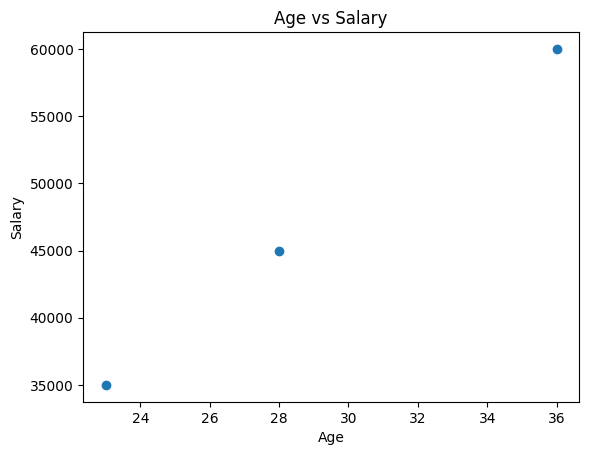

In [60]:
plt.scatter(pd_df['Age'], pd_df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()

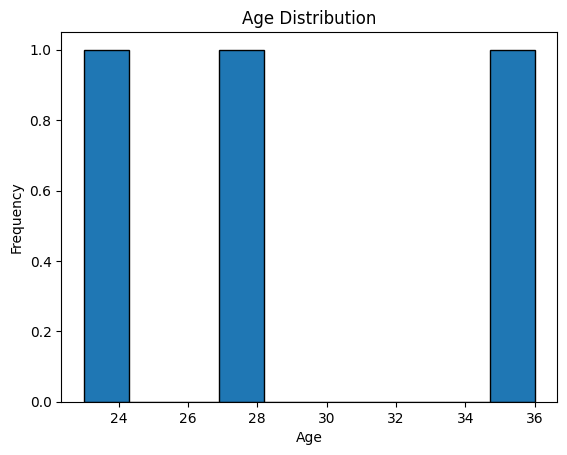

In [61]:
plt.hist(pd_df['Age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

## Correlation analysis